In [1]:
%matplotlib inline
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sunpy
import numpy as np
from sunpy.io.header import FileHeader
from sunpy.map import GenericMap
from sunpy.util import MetaDict
import traceback

In [2]:
file_prefix = "hmi.sharp_cea_720s.*_TAI.magnetogram.fits"
data_dir = "/data/SHARPS/raw-sharps/2061/"

In [3]:
def get_map(file_name):

    map_data = None
    try:
        pairs = sunpy.io.fits.read(file_name)
        new_pairs = []
        for pair in pairs:
            file_data, file_meta = pair
            assert isinstance(file_meta, FileHeader)

            if len(np.shape(file_data)) > 1:
                data = file_data
                meta = MetaDict(file_meta)
                new_pairs.append((data, meta))

            if len(new_pairs) > 0:
                data, header = new_pairs[0]
                meta = MetaDict(header)

                map_data = GenericMap(data, meta)

    except Exception as e:
        print(str(e))
        print(traceback.format_exc())

    return map_data

In [4]:
def get_data(file_name):
    results = get_map(file_name)
    if results is not None:
        out_data = [0] * 4
        out_data[0] = results

        # get metadata
        header = out_data[0].meta

        # get dimensions
        nx = out_data[0].data.shape[1]
        ny = out_data[0].data.shape[0]

        out_data[1] = nx
        out_data[2] = ny
        out_data[3] = header

        return out_data
    return None

In [7]:
files_magnetogram = glob.glob(os.path.join(data_dir, file_prefix))
files_magnetogram.sort()

In [8]:
print(get_map(files_magnetogram[0]).meta)

MetaDict([('simple', True), ('bitpix', 32), ('naxis', 2), ('naxis1', 538), ('naxis2', 213), ('pcount', 0), ('gcount', 1), ('xtension', 'BINTABLE'), ('date', '2018-05-07T09:23:51'), ('date_s', '2012-09-28T17:50:02Z'), ('date_b', '2015-11-09T07:19:21Z'), ('date-obs', '2012-09-24T11:46:19.00'), ('t_obs', '2012.09.24_11:48:02_TAI'), ('t_rec', '2012.09.24_11:48:00_TAI'), ('trecepoc', '1993.01.01_00:00:00_TAI'), ('trecstep', 720.0), ('trecunit', 'secs'), ('cadence', 720.0), ('usflux', 3.60151e+18), ('meangam', 22.098), ('meangbt', 12.78), ('meangbz', 26.088), ('meangbh', 39.445), ('meanjzd', -0.15907921), ('totusjz', 600442700.0), ('meanalp', 0.00822511), ('meanjzh', 0.00060892), ('totusjh', 0.015), ('absnjzh', 0.006), ('savncpp', 841891100.0), ('meanpot', 199.0368), ('totpot', 2.643297e+18), ('meanshr', 13.667), ('shrgt45', 0.0), ('r_value', 4.072), ('gwill', 'nan'), ('ctype1', 'CRLN-CEA'), ('ctype2', 'CRLT-CEA'), ('crpix1', 269.5), ('crpix2', 107.0), ('crval1', 94.655403), ('crval2', 17.61

In [9]:
obs_vr_list = []
obs_vw_list = []
obs_vn_list = []
dsun_obs_list = []

In [10]:
for file_name in files_magnetogram:
    file = get_map(file_name)
    if file is not None:
        meta = file.meta
        obs_vr_list.append(meta['obs_vr'])
        obs_vw_list.append(meta['obs_vw'])
        obs_vn_list.append(meta['obs_vn'])
        dsun_obs_list.append(meta['dsun_obs'] - 149597870691)

In [21]:
obs_vr_sublist = obs_vr_list[:240]
obs_vw_sublist = obs_vw_list[:240]
obs_vn_sublist = obs_vn_list[:240]
dsun_obs_sublist = dsun_obs_list[:240]

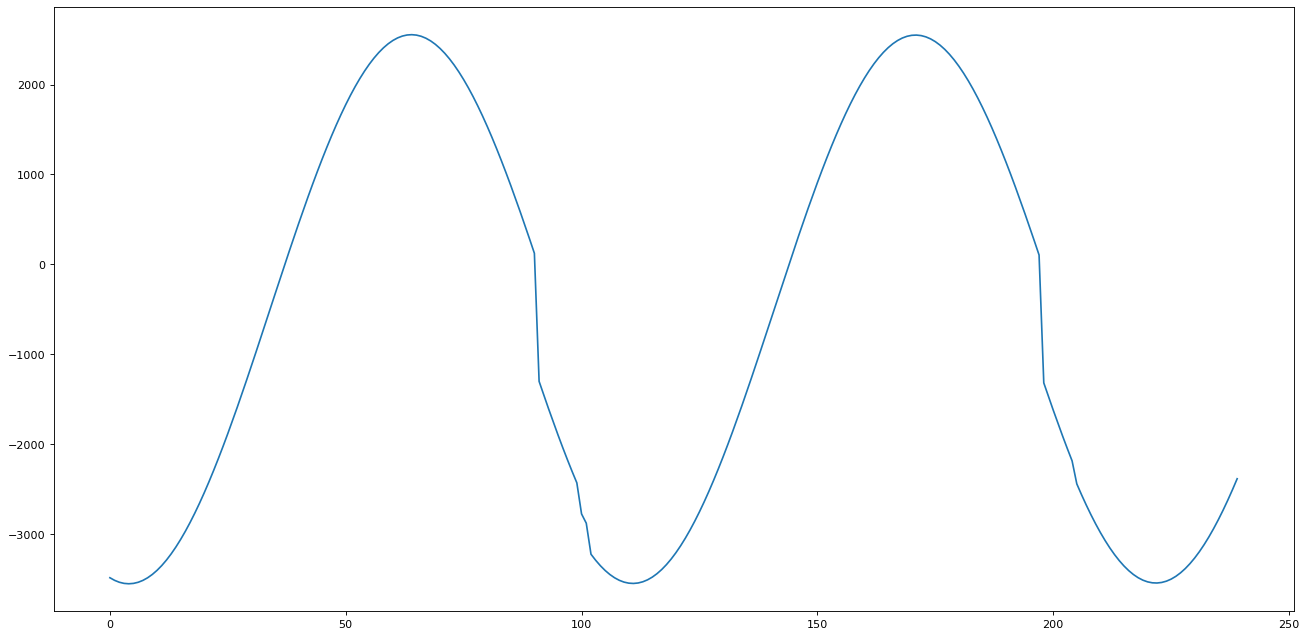

In [22]:
lab = 'obs_vr'
lineWidth = 1.5
fig, ax1 = plt.subplots(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
line1 = ax1.plot(range(len(obs_vr_sublist)), obs_vr_sublist, lw=lineWidth, label=lab, linestyle='solid')

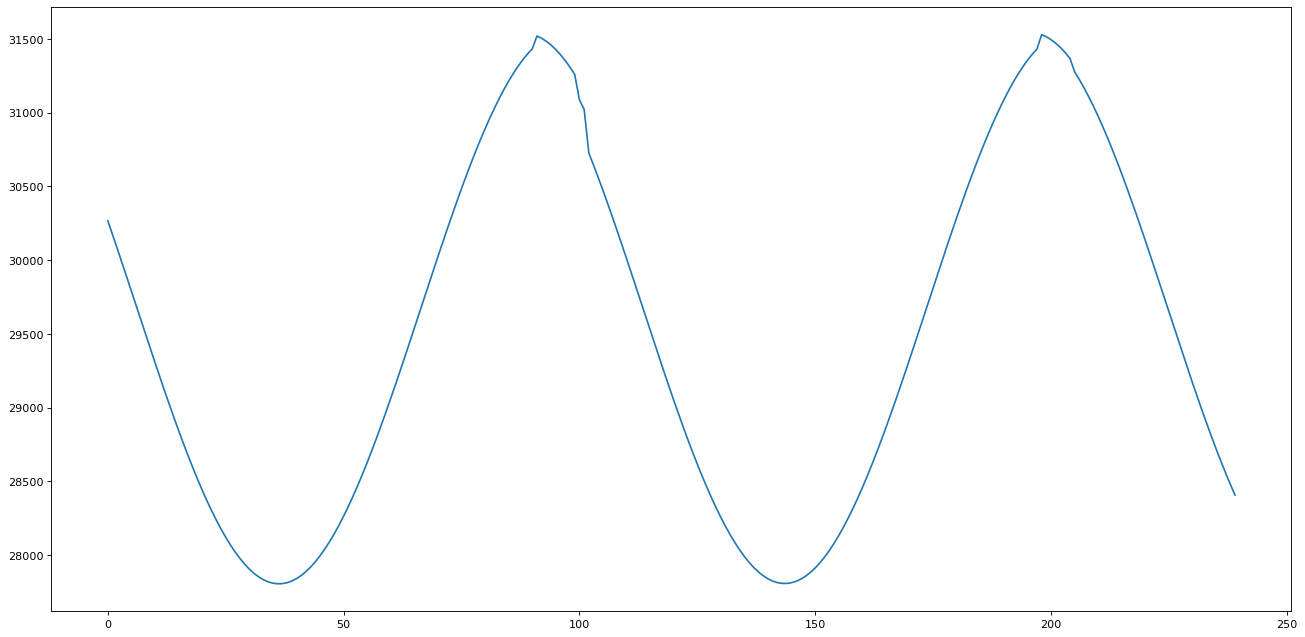

In [23]:
lab = 'obs_vw'
lineWidth = 1.5
fig, ax2 = plt.subplots(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
line1 = ax2.plot(range(len(obs_vw_sublist)), obs_vw_sublist, lw=lineWidth, label=lab, linestyle='solid')

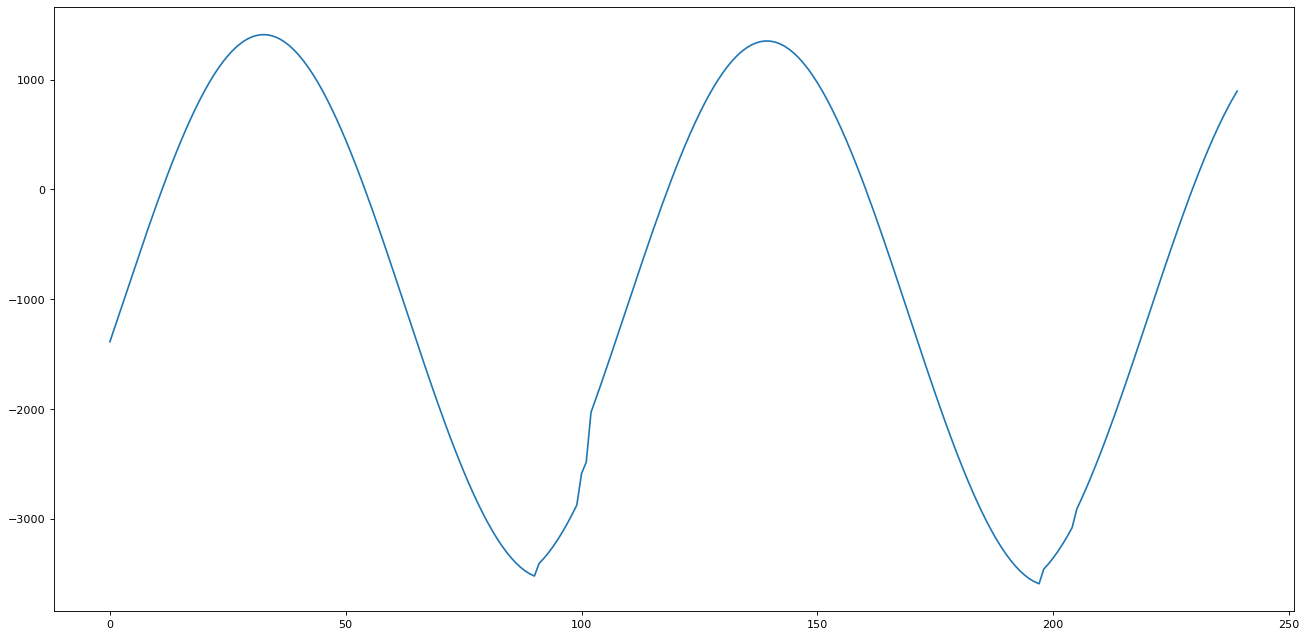

In [24]:
lab = 'obs_vn'
lineWidth = 1.5
fig, ax2 = plt.subplots(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
line1 = ax2.plot(range(len(obs_vn_sublist)), obs_vn_sublist, lw=lineWidth, label=lab, linestyle='solid')

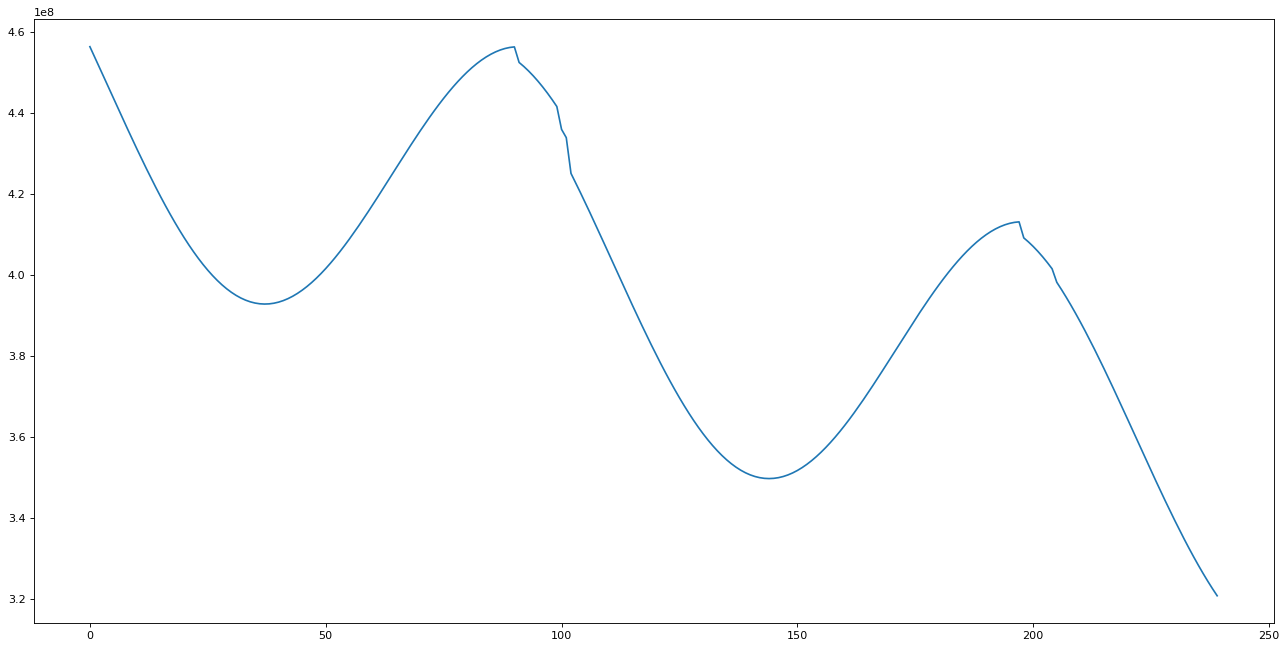

In [25]:
lab = 'dsun_obs'
lineWidth = 1.5
fig, ax2 = plt.subplots(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
line1 = ax2.plot(range(len(dsun_obs_sublist)), dsun_obs_sublist, lw=lineWidth, label=lab, linestyle='solid')